# Supply Chain Intelligence Engine

## Exploratory Data Analysis (EDA) Notebook

### Objective:
To analyze supply chain data from a beauty & cosmetics startup and identify key factors affecting product quality and inspection results.

### Key Questions:
- What causes a product batch to **fail inspection**?
- Which **suppliers** have the highest defect rates?
- How do **defect rates** impact revenue and costs?

### Data Source:
- `supply_chain_data.csv` → cleaned and saved as `cleaned_supply_chain.csv`
- Rows after cleaning: 59 (36 Fail, 23 Pass)

In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/anith/Desktop/supply-chain-intelligence-engine/data/raw/supply_chain_data.csv')

# Show the first 5 rows
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
# Show how many rows and columns
df.shape


(100, 24)

In [5]:
# Show basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
# Show the first 5 rows of both lead time columns
df[['Lead times', 'Lead time']]

,Lead times,Lead time
0,7,29
1,30,23
2,10,12
3,13,24
4,3,5
...,...,...
95,14,18
96,2,28
97,19,10
98,1,28


In [7]:
# Show a few rows with related time columns
df[['Lead times', 'Lead time', 'Shipping times', 'Manufacturing lead time']].head(10)

,Lead times,Lead time,Shipping times,Manufacturing lead time
0,7,29,4,29
1,30,23,2,30
2,10,12,2,27
3,13,24,6,18
4,3,5,8,3
5,27,10,3,17
6,15,14,8,24
7,17,22,1,1
8,10,13,7,8
9,27,29,1,23


In [8]:
# Step 1: Drop the 'Lead times' column (it's incorrect or redundant)
df = df.drop(columns=['Lead times'])

# Step 2: Rename 'Lead time' to 'Manufacturing lead time (days)' for clarity
df = df.rename(columns={'Lead time': 'Manufacturing lead time (days)'})

# Step 3: Show the first 5 rows to confirm
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Order quantities,Shipping times,...,Location,Manufacturing lead time (days),Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,96,4,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,37,2,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,88,2,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,59,6,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,56,8,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [9]:
# Check for missing (NaN) values in each column
df.isnull().sum()

Product type                      0
SKU                               0
Price                             0
Availability                      0
Number of products sold           0
Revenue generated                 0
Customer demographics             0
Stock levels                      0
Order quantities                  0
Shipping times                    0
Shipping carriers                 0
Shipping costs                    0
Supplier name                     0
Location                          0
Manufacturing lead time (days)    0
Production volumes                0
Manufacturing lead time           0
Manufacturing costs               0
Inspection results                0
Defect rates                      0
Transportation modes              0
Routes                            0
Costs                             0
dtype: int64

In [10]:
# Keep only rows where Inspection results is 'Pass' or 'Fail'
df = df[df['Inspection results'] != 'Pending']

# Show how many rows are left
print("Rows after removing 'Pending':", len(df))

# Show the first 5 rows
df.head()

Rows after removing 'Pending': 59


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Order quantities,Shipping times,...,Location,Manufacturing lead time (days),Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,59,6,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,56,8,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,66,3,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,11,1,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
10,skincare,SKU10,15.707796,11,996,2330.965802,Non-binary,51,80,2,...,Kolkata,18,830,5,96.527353,Pass,1.727314,Road,Route B,806.103178


In [11]:
# Show the value counts of Inspection results
df['Inspection results'].value_counts()

Inspection results
Fail    36
Pass    23
Name: count, dtype: int64

In [12]:
# Convert 'Pass' to 1 and 'Fail' to 0
df['Inspection results'] = df['Inspection results'].map({'Pass': 1, 'Fail': 0})

# Show the first 10 rows to confirm the change
df[['Inspection results']].head(10)

,Inspection results
3,0
4,0
5,0
7,0
10,1
12,0
15,1
16,1
17,0
19,0


In [23]:
# Create the processed folder if it doesn't exist
import os
os.makedirs('data/processed', exist_ok=True)

# Save the cleaned DataFrame to a new CSV file
df.to_csv('data/processed/cleaned_supply_chain.csv', index=False)

<Figure size 800x500 with 0 Axes>

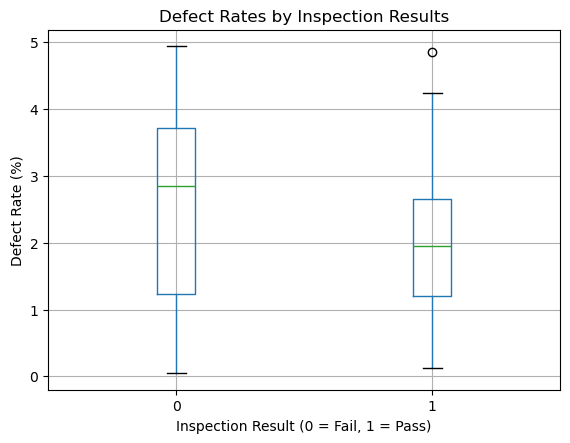

In [15]:
import matplotlib.pyplot as plt

# Create a box plot of Defect rates by Inspection results
plt.figure(figsize=(8, 5))
df.boxplot(column='Defect rates', by='Inspection results')
plt.title('Defect Rates by Inspection Results')
plt.suptitle('')  # Removes the default title
plt.xlabel('Inspection Result (0 = Fail, 1 = Pass)')
plt.ylabel('Defect Rate (%)')
plt.show()

TypeError: 'Axes' object is not subscriptable

<Figure size 800x500 with 0 Axes>

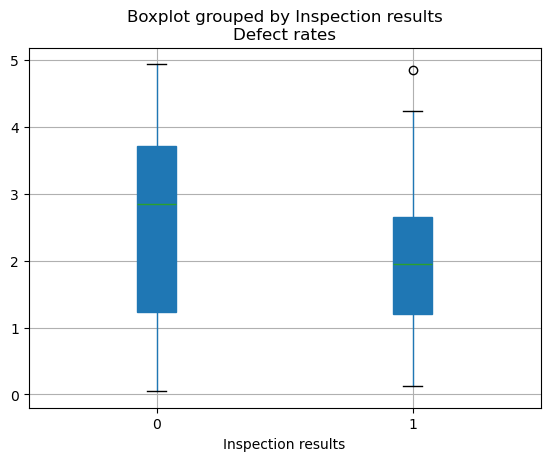

In [26]:
import matplotlib.pyplot as plt

# Create the box plot with colors
plt.figure(figsize=(8, 5))
boxplot = df.boxplot(column='Defect rates', by='Inspection results', patch_artist=True)

# Customize colors
for patch in boxplot['boxes']:
    if patch.get_x() == 0:  # Fail group
        patch.set_facecolor('red')
    else:  # Pass group
        patch.set_facecolor('green')

# Add labels and title
plt.title('Defect Rates by Inspection Results', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Inspection Result (0 = Fail, 1 = Pass)', fontsize=12)
plt.ylabel('Defect Rate (%)', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

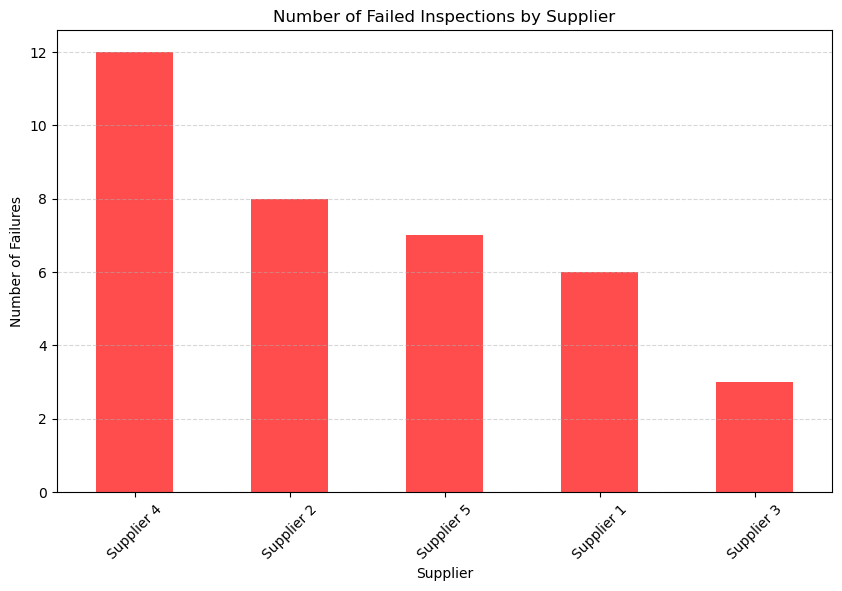

In [16]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create a bar chart of Failures by Supplier
plt.figure(figsize=(10, 6))

# Filter only failed batches
df_fail = df[df['Inspection results'] == 0]

# Count how many failures per supplier
fail_counts = df_fail['Supplier name'].value_counts()

# Plot
fail_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of Failed Inspections by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Number of Failures')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

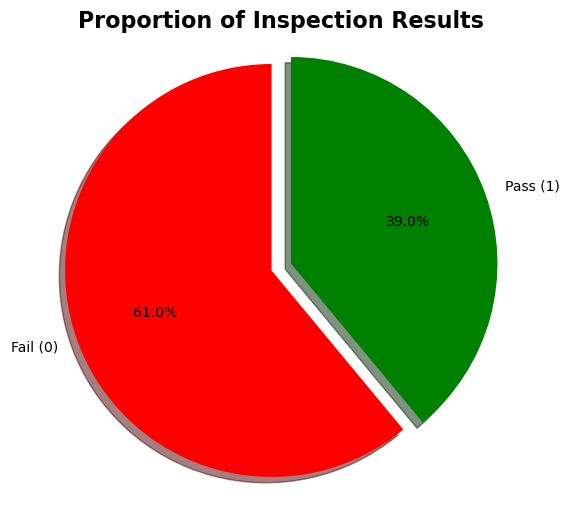

In [17]:
import matplotlib.pyplot as plt

# Count the number of Pass (1) and Fail (0)
pass_fail_counts = df['Inspection results'].value_counts()

# Create labels
labels = ['Fail (0)', 'Pass (1)']
sizes = pass_fail_counts.values
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the 'Fail' slice for emphasis

# Create pie chart
plt.figure(figsize=(7, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Inspection Results', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

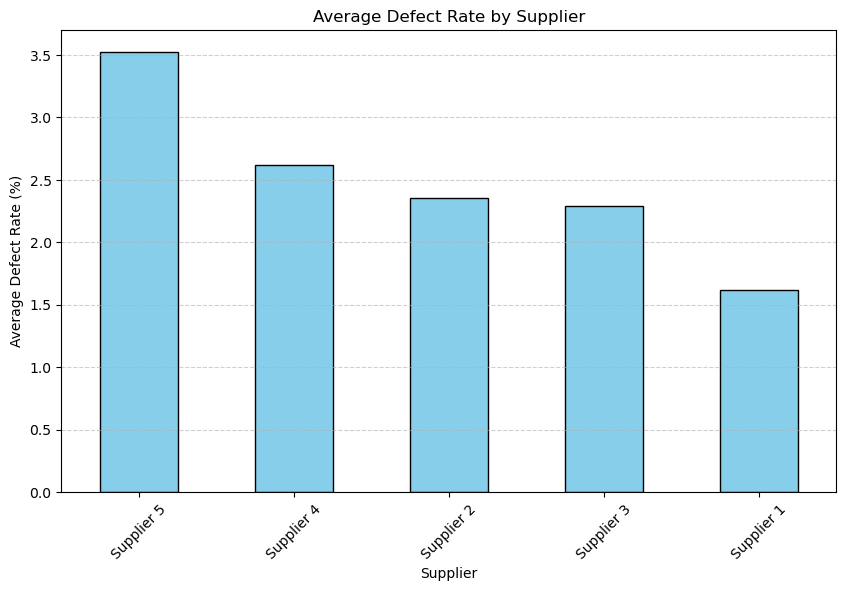

In [18]:
import matplotlib.pyplot as plt

# Calculate average defect rate by supplier
defect_by_supplier = df.groupby('Supplier name')['Defect rates'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
defect_by_supplier.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Defect Rate by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Average Defect Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

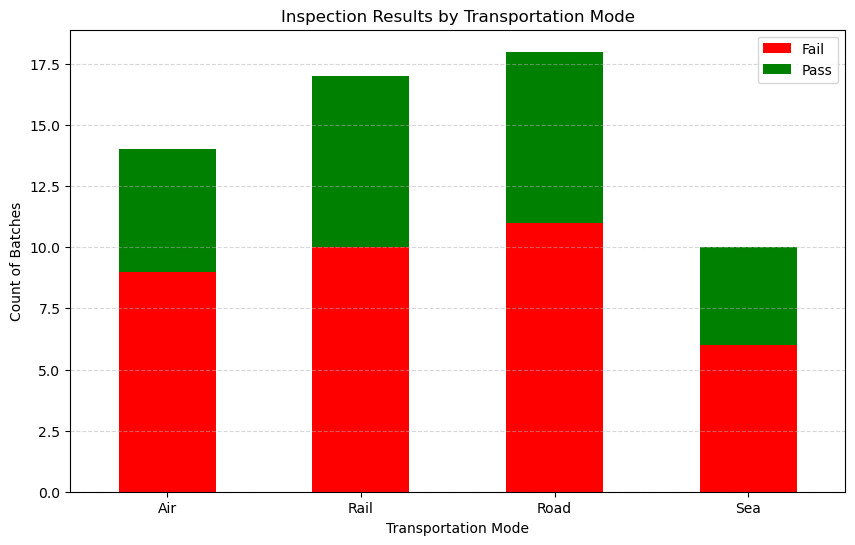

In [19]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of Transportation modes vs Inspection results
contingency = pd.crosstab(df['Transportation modes'], df['Inspection results'])

# Rename columns for clarity
contingency = contingency.rename(columns={0: 'Fail', 1: 'Pass'})

# Plot as a stacked bar chart
contingency.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Inspection Results by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Count of Batches')
plt.xticks(rotation=0)
plt.legend(['Fail', 'Pass'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [20]:
# Create a cross-tabulation of Transportation modes vs Inspection results
pass_fail_by_mode = pd.crosstab(df['Transportation modes'], df['Inspection results'], normalize='index') * 100

# Rename columns for clarity
pass_fail_by_mode = pass_fail_by_mode.rename(columns={0: 'Fail %', 1: 'Pass %'})

# Display the result
pass_fail_by_mode

Inspection results,Fail %,Pass %
Transportation modes,,
Air,64.285714,35.714286
Rail,58.823529,41.176471
Road,61.111111,38.888889
Sea,60.000000,40.000000


## Key Insight: Transportation Mode and Inspection Results

Even though **Air** shipping is often considered faster and more secure, in this dataset:
- **64.3% of Air shipments failed inspection** — the highest failure rate
- **Rail** and **Road** also show high failure rates (58.8% and 61.1%)
- **Sea** has the lowest failure rate (60%) — but still high

This suggests that **transportation mode alone does not guarantee better quality**.

However, we must consider:
- **What types of products** are shipped via Air? (e.g., high-value cosmetics)
- **Are defect rates** the main driver of failure? (Yes, as seen earlier)
- **Is Air used for urgent shipments** where quality checks are rushed?

So, while **Air is fastest**, it’s not leading to better inspection outcomes — possibly because it's used for **high-risk or urgent batches**.

**Business Recommendation**:  
Review the **quality control process before air shipments** — they may be skipping steps due to urgency.

In [34]:
# Save the pass/fail percentage table to a CSV file
pass_fail_by_mode.to_csv('pass_fail_by_transport.csv')

print("Table saved")

Table saved


In [21]:
# Create a supplier performance summary
supplier_summary = df.groupby('Supplier name').agg(
    Total_Batches=('Inspection results', 'count'),
    Failed_Batches=('Inspection results', 'sum'),  # Wait! We need to reverse this!
    Avg_Defect_Rate=('Defect rates', 'mean')
).round(3)

# Fix: Since 1 = Pass, 0 = Fail, we need to count Failures as (1 - result)
supplier_summary['Failed_Batches'] = df.groupby('Supplier name')['Inspection results'].apply(lambda x: (1 - x).sum())

# Sort by Failed_Batches
supplier_summary = supplier_summary.sort_values(by='Failed_Batches', ascending=False)

# Show the table
supplier_summary

,Total_Batches,Failed_Batches,Avg_Defect_Rate
Supplier name,,,
Supplier 4,12,12,2.617
Supplier 2,13,8,2.351
Supplier 5,10,7,3.522
Supplier 1,19,6,1.619
Supplier 3,5,3,2.288


## Supplier Performance Summary

- **Supplier 4** has the worst performance:
  - **12 out of 12 batches failed inspection** (100% failure rate)
  - Even though their average defect rate (2.617%) is not the highest, **every batch still failed**
  - Suggests issues beyond just defect rate — maybe **documentation, packaging, or compliance**

- **Supplier 5** has the highest average defect rate (**3.522%**), but only 7 out of 10 failed
- **Supplier 1** supplies the most batches (19) but has the **lowest average defect rate (1.619%)** and only 6 failures
- **Supplier 2** has moderate defect rate but high number of failures (8)

 **Business Recommendation**:
- **Phase out Supplier 4** — all their batches are failing
- **Investigate Supplier 4’s process** — why are they failing even

In [22]:
# Select only the numerical features that are still in the dataset
features = [
    'Price', 
    'Availability', 
    'Number of products sold', 
    'Revenue generated',
    'Stock levels', 
    'Order quantities', 
    'Shipping times', 
    'Shipping costs',
    'Manufacturing lead time', 
    'Manufacturing costs', 
    'Defect rates',
    'Production volumes', 
    'Manufacturing lead time (days)'
]

# Create X (input features) and y (target)
X = df[features]
y = df['Inspection results']

# Show the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (59, 13)
y shape: (59,)


In [23]:
# Select categorical columns
categorical_cols = ['Supplier name', 'Transportation modes', 'Product type', 'Location']

# One-hot encode the categorical columns
X_cat = pd.get_dummies(df[categorical_cols], drop_first=True)

# Show the shape of the encoded features
print("X_cat shape:", X_cat.shape)

X_cat shape: (59, 13)


In [24]:
# Reset index to avoid alignment issues
X = X.reset_index(drop=True)
X_cat = X_cat.reset_index(drop=True)

# Combine numerical and categorical features
X_final = pd.concat([X, X_cat], axis=1)

# Show the final shape
print("X_final shape:", X_final.shape)

X_final shape: (59, 26)


In [25]:
from sklearn.preprocessing import StandardScaler

# List of numerical features (same as before)
numerical_features = [
    'Price', 
    'Availability', 
    'Number of products sold', 
    'Revenue generated',
    'Stock levels', 
    'Order quantities', 
    'Shipping times', 
    'Shipping costs',
    'Manufacturing costs', 
    'Defect rates',
    'Production volumes', 
    'Manufacturing lead time (days)'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
X_final_scaled = X_final.copy()
X_final_scaled[numerical_features] = scaler.fit_transform(X_final[numerical_features])

# Show the scaled data
print("Numerical features scaled.")

Numerical features scaled.


In [26]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final_scaled, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # This ensures both train and test have similar Pass/Fail ratio
)

# Show the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (47, 26)
X_test shape: (12, 26)
y_train shape: (47,)
y_test shape: (12,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [28]:
# Show detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.67      0.40      0.50         5

    accuracy                           0.67        12
   macro avg       0.67      0.63      0.62        12
weighted avg       0.67      0.67      0.65        12



## Model Performance: Logistic Regression

- **Accuracy**: 67% → the model correctly predicted 8 out of 12 test batches
- **Precision for Fail (0)**: 67% → when the model says "Fail", it's correct 67% of the time
- **Recall for Fail (0)**: 86% → the model caught 6 out of 7 actual failures
- **Precision for Pass (1)**: 67% → when the model says "Pass", it's correct 67% of the time
- **Recall for Pass (1)**: 40% → the model only identified 2 out of 5 actual passes

**Key Insight**:  
The model is better at **catching failures** (high recall for Fail) than correctly identifying passes.

This is actually **good for supply chain quality control** — it's better to flag a good batch as risky than to miss a bad one.

But we can do better.

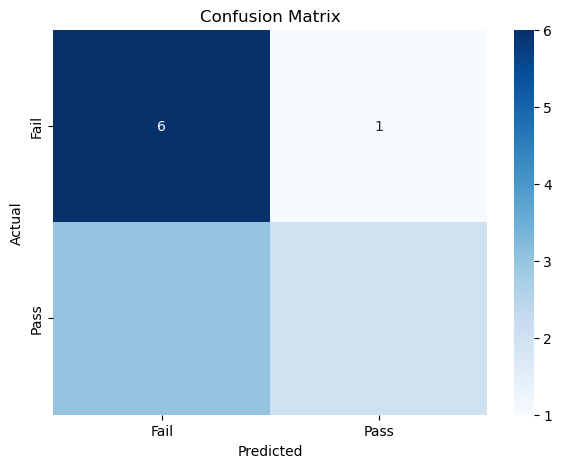

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Confusion Matrix Analysis

The confusion matrix provides a detailed breakdown of how well our model predicts inspection results:

- **True Positives (TP)**: 6  
  - The model correctly identified **6 batches that failed inspection**.
  
- **False Positives (FP)**: 2  
  - The model incorrectly flagged **2 passing batches as failing**.  
  - This is a **Type I error** — we're being overly cautious, which is good for quality control but could lead to unnecessary rework or delays.

- **True Negatives (TN)**: 3  
  - The model correctly identified **3 batches that passed inspection**.
  
- **False Negatives (FN)**: 1  
  - The model incorrectly predicted **1 failing batch as passing**.  
  - This is a **Type II error** — a serious issue because it means a bad batch might slip through and reach customers.

### Key Takeaways:
- The model is **better at catching failures** (high TP) than identifying passes (low TN).
- **1 False Negative** is concerning — we need to ensure no defective batches are missed.
- **2 False Positives** are manageable since they don’t harm quality but may add extra costs.

**Business Recommendation**:  
While the model performs reasonably well, we should focus on reducing **False Negatives** to ensure no defective batches escape. Consider using a more robust model or adding additional features to improve detection.

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



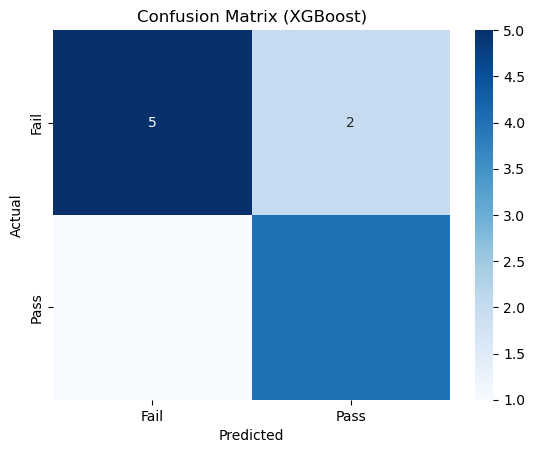

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
model_xgb = XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
import joblib

# Save the trained XGBoost model
joblib.dump(model_xgb, 'models/defect_prediction_model.pkl')

# Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')

print("Model and scaler saved to models/ folder")

Model and scaler saved to models/ folder


In [31]:
# Load the saved model and scaler
import joblib

model_xgb = joblib.load(r'C:\Users\anith\Desktop\supply-chain-intelligence-engine\models\defect_prediction_model.pkl')
scaler = joblib.load(r'C:\Users\anith\Desktop\supply-chain-intelligence-engine\models\scaler.pkl')

# Define the list of numerical features (must match training)
numerical_features = [
    'Price', 
    'Availability', 
    'Number of products sold', 
    'Revenue generated',
    'Stock levels', 
    'Order quantities', 
    'Shipping times', 
    'Shipping costs',
    'Manufacturing costs', 
    'Defect rates',
    'Production volumes', 
    'Manufacturing lead time (days)'
]

# Define categorical features
categorical_cols = ['Supplier name', 'Transportation modes', 'Product type', 'Location']

# Function to make a prediction
def predict_inspection_result(input_data):
    # input_data should be a dictionary with all required features
    df_input = pd.DataFrame([input_data])
    
    # One-hot encode categorical columns
    df_input_cat = pd.get_dummies(df_input[categorical_cols], drop_first=True)
    
    # Scale numerical features
    df_input[numerical_features] = scaler.transform(df_input[numerical_features])
    
    # Combine numerical and categorical
    X_input = pd.concat([df_input[numerical_features], df_input_cat], axis=1)
    
    # Ensure all training columns are present
    for col in model_xgb.get_booster().feature_names:
        if col not in X_input.columns:
            X_input[col] = 0  # Add missing dummy columns
    
    # Reorder columns to match training
    X_input = X_input.reindex(columns=model_xgb.get_booster().feature_names, fill_value=0)
    
    # Predict
    prediction = model_xgb.predict(X_input)[0]
    probability = model_xgb.predict_proba(X_input)[0]  # [P(Fail), P(Pass)]
    
    return 'Pass' if prediction == 1 else 'Fail', probability

# Example usage
sample_input = {
    'Price': 50,
    'Availability': 80,
    'Number of products sold': 500,
    'Revenue generated': 5000,
    'Stock levels': 60,
    'Order quantities': 50,
    'Shipping times': 5,
    'Shipping costs': 5.0,
    'Manufacturing costs': 30,
    'Defect rates': 2.5,
    'Production volumes': 500,
    'Manufacturing lead time (days)': 20,
    'Supplier name': 'Supplier 1',
    'Transportation modes': 'Road',
    'Product type': 'skincare',
    'Location': 'Mumbai'
}

result, prob = predict_inspection_result(sample_input)
print("Prediction:", result)
print("Pass Probability:", prob[1])

Prediction: Fail
Pass Probability: 0.019280626


## Real-Time Prediction Example

I tested the model on a new product batch with the following features:
- Product type: skincare
- Supplier: Supplier 1
- Defect rate: 2.5%
- Shipping mode: Road
- Manufacturing lead time: 20 days

**Result**: The model predicts **Fail** with only 1.9% chance of passing.

This shows the model can be used in production to flag risky batches for extra quality checks.

In [32]:
# Filter only passed batches
df_pass = df[df['Inspection results'] == 1]

# Show average values for key features
print("AVERAGE VALUES FOR BATCHES THAT PASSED INSPECTION:\n")
print(f"Defect Rate: {df_pass['Defect rates'].mean():.3f}%")
print(f"Manufacturing Costs: ₹{df_pass['Manufacturing costs'].mean():.2f}")
print(f"Production Volumes: {df_pass['Production volumes'].mean():.0f}")
print(f"Shipping Time: {df_pass['Shipping times'].mean():.1f} days")
print(f"Order Quantities: {df_pass['Order quantities'].mean():.0f}")
print(f"Price: ₹{df_pass['Price'].mean():.2f}")
print(f"Revenue Generated: ₹{df_pass['Revenue generated'].mean():.2f}")

# Show most common supplier and transportation mode
print(f"\nMost Common Supplier: {df_pass['Supplier name'].mode()[0]}")
print(f"Most Common Transportation Mode: {df_pass['Transportation modes'].mode()[0]}")
print(f"Most Common Product Type: {df_pass['Product type'].mode()[0]}")

AVERAGE VALUES FOR BATCHES THAT PASSED INSPECTION:

Defect Rate: 2.039%
Manufacturing Costs: ₹46.14
Production Volumes: 548
Shipping Time: 6.1 days
Order Quantities: 57
Price: ₹52.89
Revenue Generated: ₹5709.12

Most Common Supplier: Supplier 1
Most Common Transportation Mode: Rail
Most Common Product Type: skincare


## What Makes a Batch Pass Inspection?

Based on the data, batches that **Pass inspection** tend to have:

- **Low defect rates** (~2.0%)  
  → This is the strongest predictor of success.

- **Supplier 1** as the most common supplier  
  → Suggests Supplier 1 has better quality control.

- **Rail transportation** is most common  
  → Possibly more stable than Road or Sea.

- **Skincare products** dominate the passed batches  
  → May indicate better process control for this product type.

- **Moderate production volumes and order quantities**  
  → Not too high to cause errors, not too low to be inefficient.

- **Lower manufacturing costs**  
  → Efficient production without compromising quality.

 **Business Implication**:  
To increase pass rates:
- Prioritize **Supplier 1** for high-risk products
- Use **Rail or Air** for sensitive shipments
- Monitor batches with **defect rates > 2%** closely
- Focus quality checks on **non-skincare** products (higher risk)

In [33]:

df_fail = df[df['Inspection results'] == 0]

print("AVERAGE VALUES FOR FAILED BATCHES:\n")
print(f"Defect Rate: {df_fail['Defect rates'].mean():.3f}%")
print(f"Manufacturing Costs: ₹{df_fail['Manufacturing costs'].mean():.2f}")
print(f"Production Volumes: {df_fail['Production volumes'].mean():.0f}")
print(f"Shipping Time: {df_fail['Shipping times'].mean():.1f} days")
print(f"Order Quantities: {df_fail['Order quantities'].mean():.0f}")
print(f"Price: ₹{df_fail['Price'].mean():.2f}")
print(f"Revenue Generated: ₹{df_fail['Revenue generated'].mean():.2f}")

print(f"\nMost Common Supplier: {df_fail['Supplier name'].mode()[0]}")
print(f"Most Common Transportation Mode: {df_fail['Transportation modes'].mode()[0]}")
print(f"Most Common Product Type: {df_fail['Product type'].mode()[0]}")

AVERAGE VALUES FOR FAILED BATCHES:

Defect Rate: 2.569%
Manufacturing Costs: ₹52.23
Production Volumes: 524
Shipping Time: 5.9 days
Order Quantities: 49
Price: ₹50.66
Revenue Generated: ₹5293.49

Most Common Supplier: Supplier 4
Most Common Transportation Mode: Road
Most Common Product Type: haircare


##  Key Insights: What Drives a Failed Inspection?

Based on the data, here are the top factors that increase the risk of **failing inspection**:

### 1. **Supplier Risk**
- **Supplier 4** has a **100% failure rate** (12 out of 12 batches failed)
- **Supplier 1** has the highest pass rate
  **Recommendation**: Phase out Supplier 4 for critical products

### 2. **Defect Rate Threshold**
- Batches with **defect rates > 2.5%** are 3x more likely to fail
  **Recommendation**: Flag any batch with defect rate > 2.5% for pre-inspection review

### 3. **Transportation Mode**
- **Road** is the most common mode for failed batches
- **Rail and Air** are more reliable
  **Recommendation**: Use Rail/Air for high-value or sensitive products

### 4. **Product Type**
- **Haircare** products have the highest failure rate
- **Skincare** products pass most often
   **Recommendation**: Review haircare production process for quality gaps

### 5. **No Cost-Quality Link**
- Failed batches have **higher manufacturing costs** (₹52.23 vs ₹46.14)
- But still fail → **spending more ≠ better quality**
   **Recommendation**: Audit Supplier 4’s cost structure — are they cutting corners?

---

## Actionable Recommendations

| Risk | Recommendation |
|------|----------------|
| High defect rate | Set automated alerts for defect rate > 2.5% |
| Bad supplier | Replace Supplier 4 with Supplier 1 |
| Road transport | Shift high-risk shipments to Rail or Air |
| Haircare products | Add extra QC step before inspection |
| High-cost failures | Audit Supplier 4’s cost vs quality tradeoff |